In [2]:
import numpy as np

In [100]:
# First steepest descent algorithm implementation

def steepest(A, b, x, eps, maxiter):
    AT = np.transpose(A)
    A = np.matmul(AT, A)
    b = np.matmul(AT, b)
    i = 1
    r = b - np.matmul(A, x)
    delta = np.dot(r, r)
    conv = [delta]
    while (np.sqrt(delta) > eps):
        q = np.matmul(A, r)
        alpha = delta / np.dot(q, r)
        x = x + alpha * r
        if (i % 50 == 0):
            r = b - np.matmul(A, x)
        else:
            r = r - alpha * q
        delta = np.dot(r, r)
        conv.append(delta)
        i += 1
    return x, conv + [i]

    

In [101]:
A = np.array([[100, 3, -2], [1, 200, 5], [-4, 3, 100]])
b = np.array([800, 1000, 500])
x0 = np.array([0, 0, 0])

print(steepest(A, b, x0, 0.0001, 1000)[0])

[7.95854215 4.8308719  5.17341553]


In [98]:
np.linalg.solve(A, b)

array([7.95854215, 4.8308719 , 5.17341553])

In [56]:
# Second steepest descent algorithm implementation

def steepest1(A, b, eps):
    x = np.array([0 for _ in range(len(b))])
    AT = np.transpose(A)
    A = np.matmul(AT, A)
    b = np.matmul(AT, b)
    r = b - np.matmul(A, x)
    
    while (np.sqrt(np.dot(r, r)) > eps):
        alpha = np.dot(r, r) / np.dot(np.matmul(A, r), r)
        x = x + alpha * r
        r = b - np.matmul(A, x)
        
        
    return x

In [57]:
steepest1(A, b, 0.001)

array([7.9585421 , 4.83087191, 5.17341547])

[93.         51.         91.99999999]
[93. 51. 92.]
[93, 51, 92]
Initial condition number:  7.016898208963339


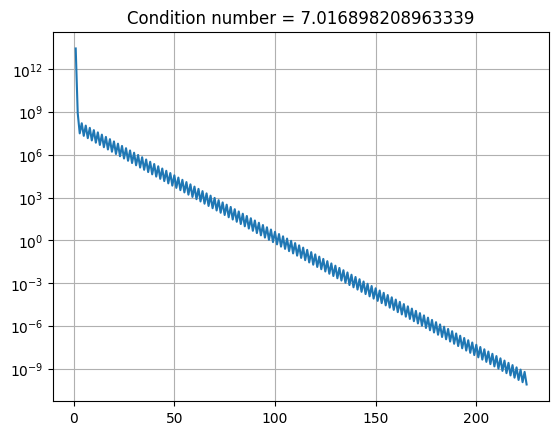

In [137]:
from random import randint
import matplotlib.pyplot as plt

n = 3
A = [[randint(1, 100) for k in range(n)] for i in range(n)]
X = [randint(1, 100) for i in range(n)]
f = np.matmul(A, X)
x0 = [0 for _ in range(n)]

solution = steepest(A, f, x0, 0.00001, 1000)
plt.plot([i + 1 for i in range(solution[1][-1])], solution[1][:-1])
plt.title(f'Condition number = {np.linalg.cond(A)}')
plt.grid()
plt.yscale('log')
print(steepest(A, f, x0, 0.00001, 1000)[0])
print(np.linalg.solve(A, f))
print(X)
print("Initial condition number: ", np.linalg.cond(A))
# A[0][0] += 10000
# A[-1][-1] = 1
# print("New condition number: ", np.linalg.cond(A))

New condition number:  5619.374385780166


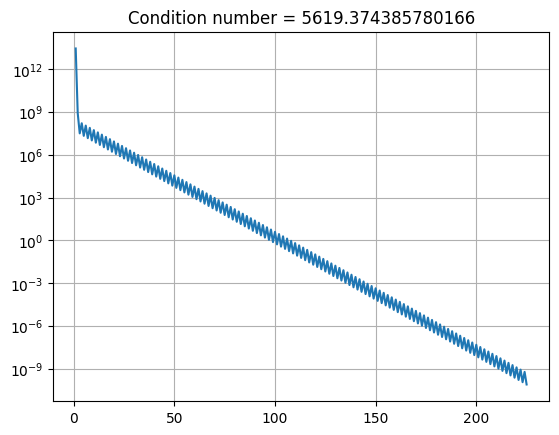

In [139]:
A[0][0] += 100000
A[-1][-1] = 1
print("New condition number: ", np.linalg.cond(A))
if (np.linalg.cond(A) > 1000):
    plt.plot([i + 1 for i in range(solution[1][-1])], solution[1][:-1])
    plt.title(f'Condition number = {np.linalg.cond(A)}')
    plt.grid()
    plt.yscale('log')